In [46]:
import os 
from image_series import *
import pandas as pd 
import matplotlib.pyplot as plt
import pickle
import cv2

## using image_series

## init
note that the image series class has save options that are set to False by default.

In [99]:
#path to the folder that contains the raw images.
path = r"C:\Users\user\Desktop\work\nematics\nematics\nematics\Ken\IO\raw_images\hbec"

In [100]:
IS = image_series(path, window_size=40, Optical_Flow_window=60,
    save_defects=True,
    save_orientation=True,
    save_flow=True,
    save_velocity= True)

### running optical flow 
uses the `Optical_Flow_window` as the window size or can set window size when using the function.

In [4]:
IS.optical_flow(window=55)

### plot

In [92]:
im_path = r"C:\Users\user\Desktop\work\nematics\nematics\nematics\Ken\IO\raw_images\hbec\Trans__s2_0000.tif"
raw = cv2.imread(im_path)[:,:,0]

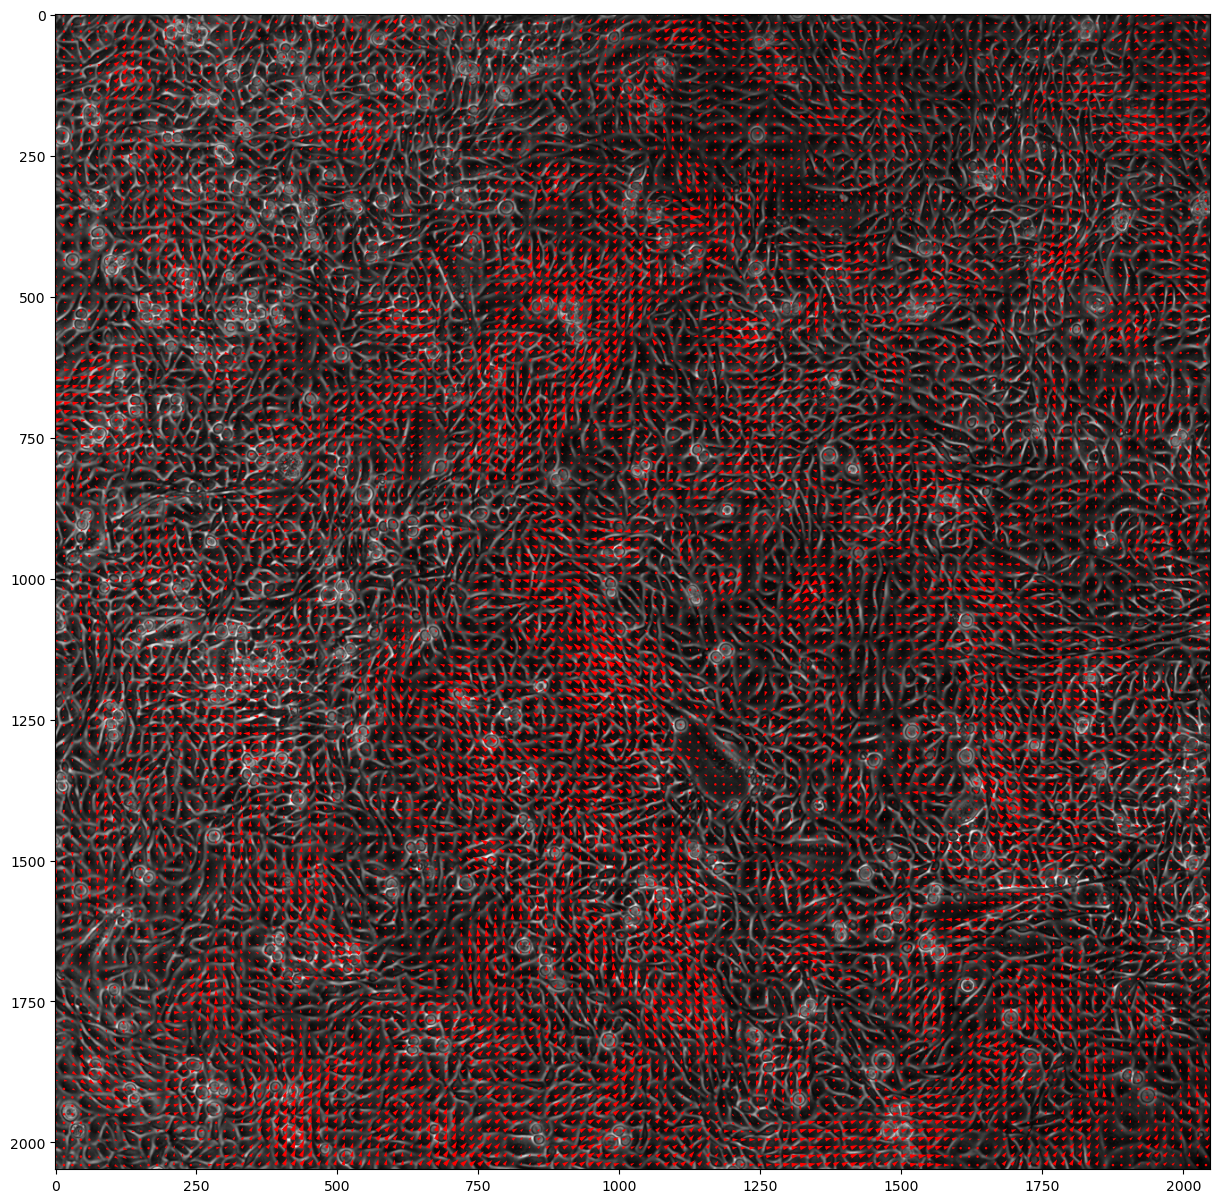

In [93]:
flow1_path = r"C:\Users\user\Desktop\work\nematics\nematics\nematics\Ken\IO\raw_images\velocity\velocity_from_Trans__s2_0000.npy"
flow1 = np.load(flow1_path)

step = 15
x = np.arange(0, raw.shape[1], step, dtype=np.int16)
y = np.arange(0, raw.shape[0], step, dtype=np.int16)
fig = plt.figure(figsize=(15,15))
plt.imshow(raw, cmap="gray")
plt.quiver(x,y, 
    flow1[:,:,0][::step,::step], #x-axis 
    -flow1[:,:,1][::step,::step,], #y-axis 
    color="red")
 

## orientation

In [ ]:
IS.calc_orientation()

### plot

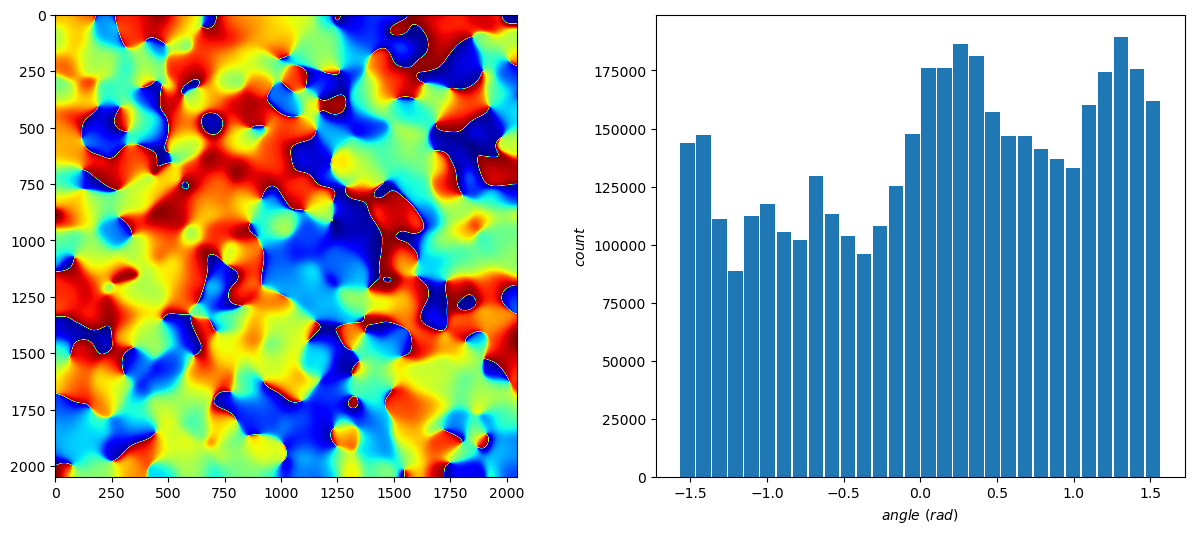

In [103]:
pix_x = raw.shape[0]
pix_y = raw.shape[1]

x = np.arange(0,pix_x)
y = np.arange(0,pix_y)

xx, yy = np.meshgrid(x, y)

ori_path = r"C:\Users\user\Desktop\work\nematics\nematics\nematics\Ken\IO\raw_images\orientation\orientation_from_Trans__s2_0000.npy"
ori = np.load(ori_path)
fig, axs = plt.subplots(1,2, figsize=(15, 6))
axs[1].hist(ori.ravel(), bins=30, rwidth=.9)
plt.ylabel('$count$')
plt.xlabel('$angle~(rad)$')
axs[0].imshow(ori, cmap="jet")

## detect defects

In [ ]:
IS.detect_defects()

### plot

Text(0, 0.5, 'y (in pixels)')

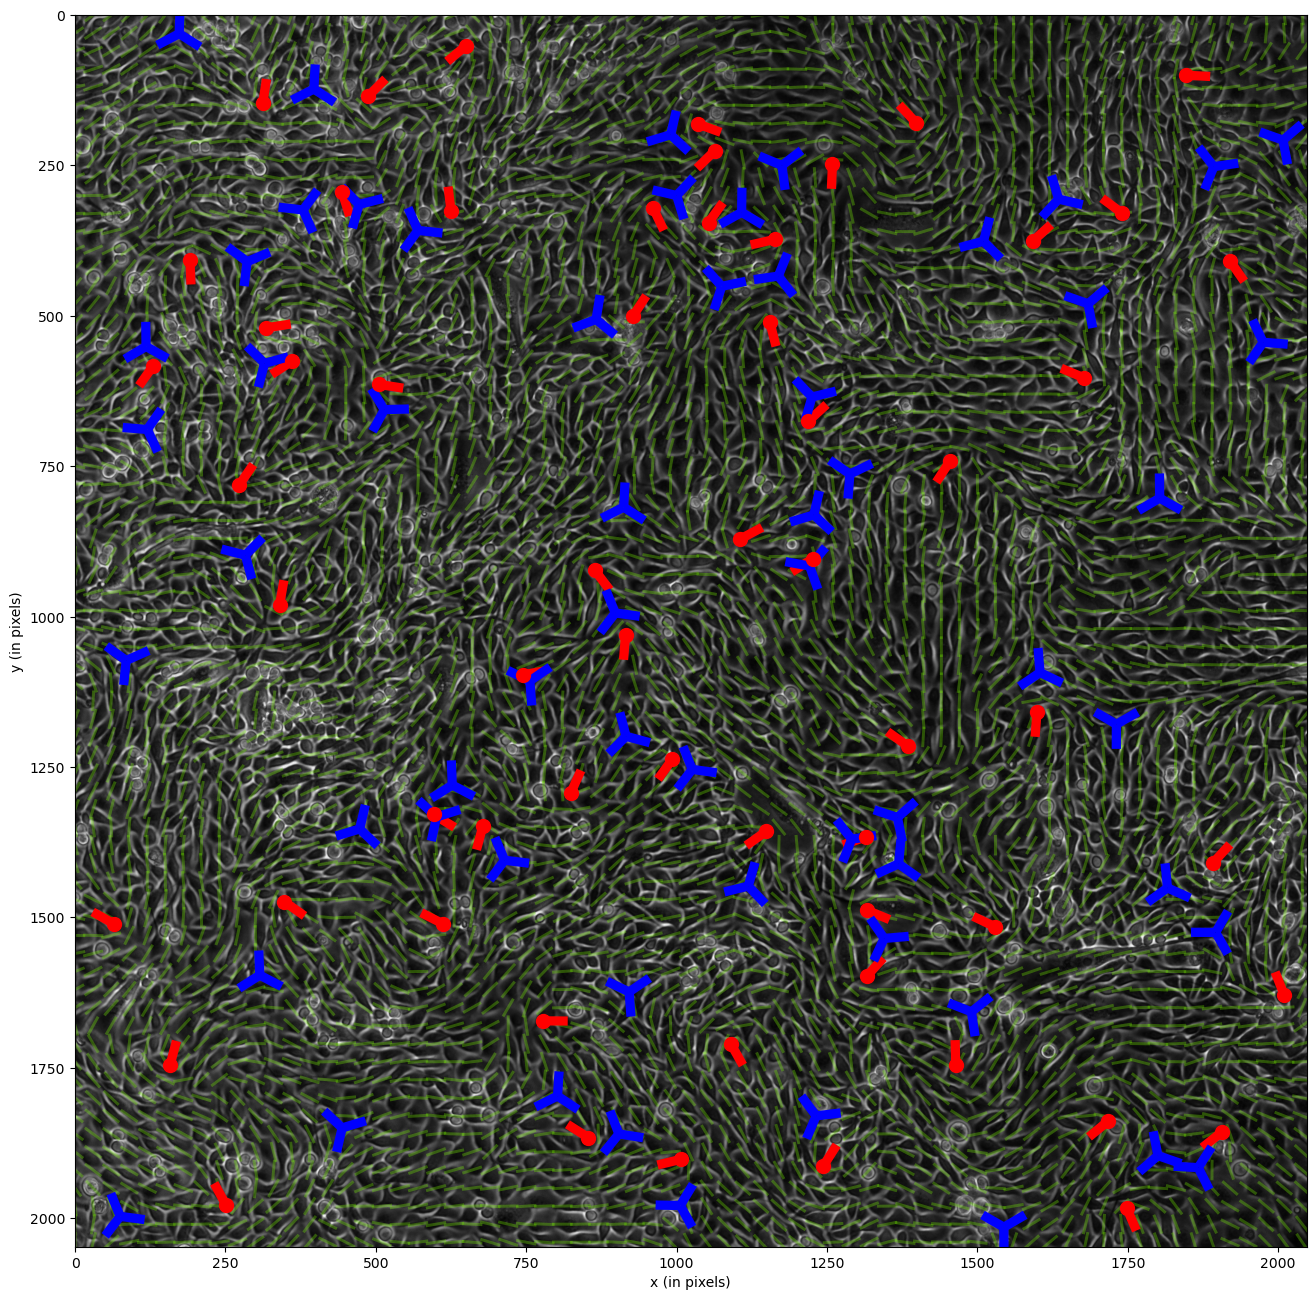

In [113]:
plushalf = pd.read_csv(r"C:\Users\user\Desktop\work\nematics\nematics\nematics\Ken\IO\raw_images\defects_csv\Trans__s2_0000_PlusHalf.csv")
minushalf = pd.read_csv(r"C:\Users\user\Desktop\work\nematics\nematics\nematics\Ken\IO\raw_images\defects_csv\Trans__s2_0000_MinusHalf.csv")

fig, ax  = plt.subplots(figsize=(16,16))
s = 30
ax.imshow(raw, cmap='gray')
ax.quiver(xx[::s,::s], yy[::s,::s], 
    np.cos(ori)[::s,::s], np.sin(ori)[::s,::s], 
    headaxislength=0, headwidth=0, headlength=0, 
    color='lawngreen', scale=60, pivot='mid', alpha=.3)

ax.plot(plushalf['x'], plushalf['y'],'ro',markersize=10,label=r'+1/2 defect')
ax.quiver(plushalf['x'], plushalf['y'], 
    np.cos(plushalf['ang1']), np.sin(plushalf['ang1']), 
    headaxislength=0, headwidth=0, headlength=0, color='r', scale=50)

for i in range(3):
    ax.quiver(minushalf['x'], minushalf['y'], 
        np.cos(minushalf['ang'+str(i+1)]), np.sin(minushalf['ang'+str(i+1)]), 
        headaxislength=0, headwidth=0, headlength=0, color='b', scale=50)

ax.set_xlabel('x (in pixels)')
ax.set_ylabel('y (in pixels)')

## velocity averaging 
as a byproduct creates a folder with 350X350X2 arrays of the valocity around each defect   

In [2]:
IS.velocity_averaging()

In [114]:
arr = np.load(r"C:\Users\user\Desktop\work\nematics\nematics\nematics\Ken\IO\raw_images\velocity_around_minus\_mean_arr_from_Trans__s2_0000.npy")


### plot

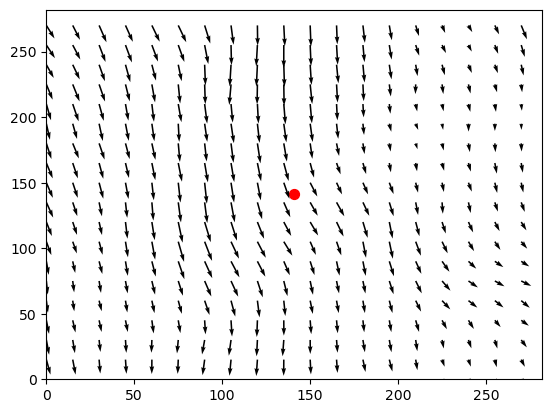

In [129]:
average_velocity_x = arr[:,:,0]
average_velocity_y = arr[:,:,1]

# Get the shape of the image
image_shape = average_velocity_x.shape

# Create a grid of coordinates
# x, y = np.meshgrid(np.arange(image_shape[1]), np.arange(image_shape[0]))

step = 15
x = np.arange(0, arr.shape[1], step, dtype=np.int16)
y = np.arange(0, arr.shape[0], step, dtype=np.int16)

# Create a new figure and set the axis limits
fig, ax = plt.subplots()
ax.set_xlim([0, image_shape[1]])
ax.set_ylim([0, image_shape[0]])

center = np.array(average_velocity_magnitude.shape)/2
ax.scatter(center[1], center[0], marker='o', s=50, color='red')


# Plot the average velocity as arrows on the image
ax.quiver(x, y, average_velocity_x[::step,::step], average_velocity_y[::step,::step])

# Display the plot
plt.show()


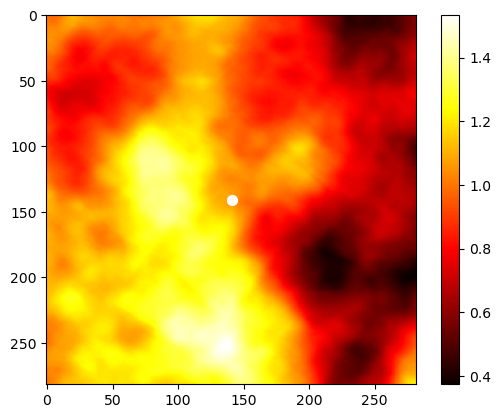

In [119]:
# Get the magnitude of the average velocity
average_velocity_magnitude = np.sqrt(average_velocity_x**2 + average_velocity_y**2)

# Create a new figure
fig, ax = plt.subplots()

# Plot the heatmap using the imshow function
im = ax.imshow(average_velocity_magnitude, cmap='hot')

# Add a dot in the center of the plot
center = np.array(average_velocity_magnitude.shape)/2
ax.scatter(center[1], center[0], marker='o', s=50, color='white')

# Add a colorbar to the plot
cbar = ax.figure.colorbar(im, ax=ax)

# Display the plot
plt.show()

In [116]:
arr.shape

(282, 282, 2)